In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import pickle

import sys
repo_base_path = Path("./../../").resolve()
assert str(repo_base_path).endswith("csg_is"), f"{repo_base_path} is not a valid path to the CSG_IS repository" 

sys.path.append(str(repo_base_path))

# from py_dataset import get_all_files_df
# from py_dataset import read_in_files
from py_dataset import feature_plotting
# from py_dataset import feature_selection
# from py_dataset import net_feature_engineering
# from py_dataset import entropy_feature_engineering
# from py_dataset.classes import DataSource
from py_dataset import sys_func

from py_dataset.classes import DataSource



In [2]:
def collect_data_sources(columns):
    data_sources = []
    for column in columns:
        try:
            dtype = DataSource.from_single_column(column)
            
            # ResourceUsageEvents_RP4 and ResourceUsageEvents should be same in plot below
            if dtype is DataSource.ResourceUsageEvents_RP4:
                dtype = DataSource.ResourceUsageEvents
            data_sources.append(dtype)
        except ValueError as e:
            if str(column).endswith("_data"):
                dtype = "_".join(str(column).split("_")[-2:])
                
                dtype = DataSource.from_string_name(dtype)
                data_sources.append(dtype)
            else:
                data_sources.append(DataSource.SystemCalls)
    
    return data_sources

In [3]:
df = pd.read_csv("weight_selected_20s.csv")
df.head(1)
df["data_source"] = collect_data_sources(df["0"])
print(df["data_source"].unique())
df["file_path"] = Path("weight_selected_20s.csv")

[<DataSource.SystemCalls: {}>
 <DataSource.FileSystem: {'ext4:ext4_mb_bitmap_load', 'block:block_bio_remap', 'ext4:ext4_mballoc_alloc', 'ext4:ext4_es_shrink_scan_enter', 'jbd2:jbd2_handle_extend', 'ext4:ext4_es_shrink', 'ext4:ext4_alloc_da_blocks', 'writeback:sb_mark_inode_writeback', 'ext4:ext4_free_inode', 'ext4:ext4_ind_map_blocks_exit', 'ext4:ext4_mb_new_inode_pa', 'writeback:inode_switch_wbs', 'ext4:ext4_fsmap_low_key', 'ext4:ext4_getfsmap_low_key', 'ext4:ext4_ext_convert_to_initialized_fastpath', 'ext4:ext4_readpage', 'ext4:ext4_da_write_pages_extent', 'writeback:writeback_start', 'ext4:ext4_invalidatepage', 'writeback:writeback_congestion_wait', 'block:block_plug', 'ext4:ext4_da_write_end', 'ext4:ext4_remove_blocks', 'ext4:ext4_mb_release_group_pa', 'ext4:ext4_da_write_pages', 'ext4:ext4_fallocate_exit', 'ext4:ext4_mballoc_prealloc', 'writeback:writeback_written\n', 'block:block_rq_requeue', 'ext4:ext4_sync_file_exit', 'ext4:ext4_ext_handle_unwritten_extents', 'ext4:ext4_mb_new_

In [4]:
files = list((repo_base_path / "training" / "single_layer" / "other_time_windows").glob("weight_selected_*.csv"))

dfs = []
dfs.append(df)

for file_path in files:
    df = pd.read_csv(str(file_path))
    df["data_source"] = collect_data_sources(df["0"])
    df["file_path"] = file_path

    dfs.append(df)

In [5]:
all_df = pd.concat(dfs)

In [6]:
all_df["data_source"].value_counts().keys()

Index([           DataSource.SystemCalls,    DataSource.ResourceUsageEvents,
                   DataSource.FileSystem,           DataSource.KernelEvents,
       DataSource.BlockInputOutputEvents],
      dtype='object')

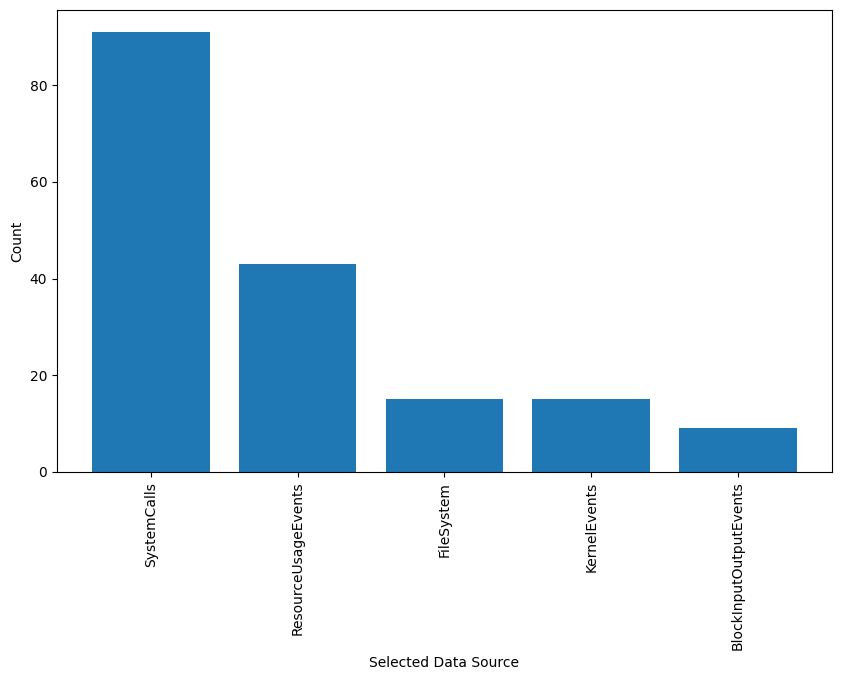

In [7]:
import matplotlib.pyplot as plt

dic = all_df["data_source"].value_counts()
key_strs = [str(f).removeprefix("DataSource.") for f in dic.keys()]

plt.figure(figsize=(10, 6))
plt.bar(range(dic.count()), dic.values)
plt.xlabel('Selected Data Source')
plt.ylabel('Count')
# plt.title('')
plt.xticks(range(dic.count()),key_strs, rotation=90)
plt.show()

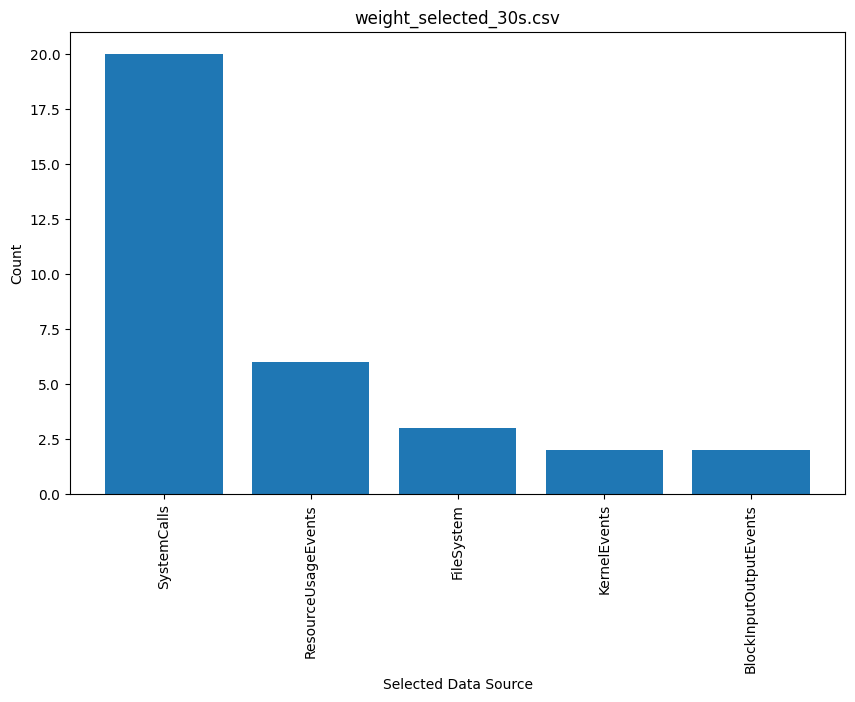

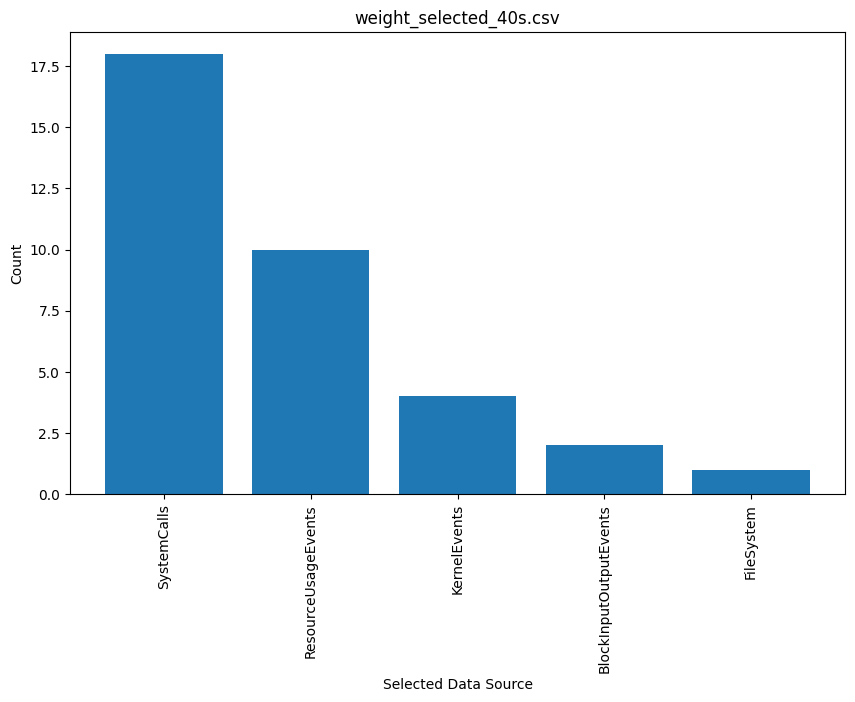

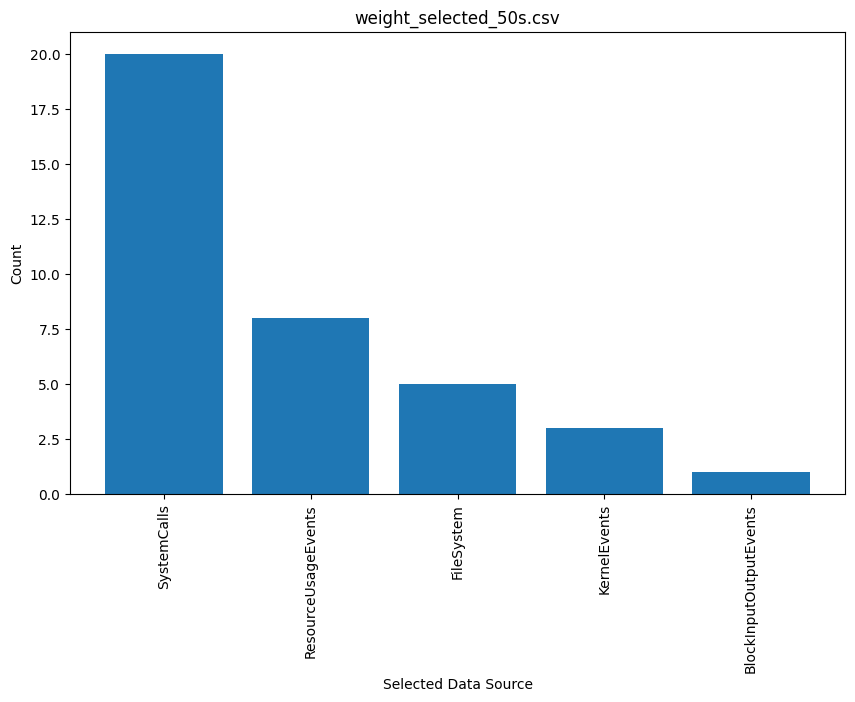

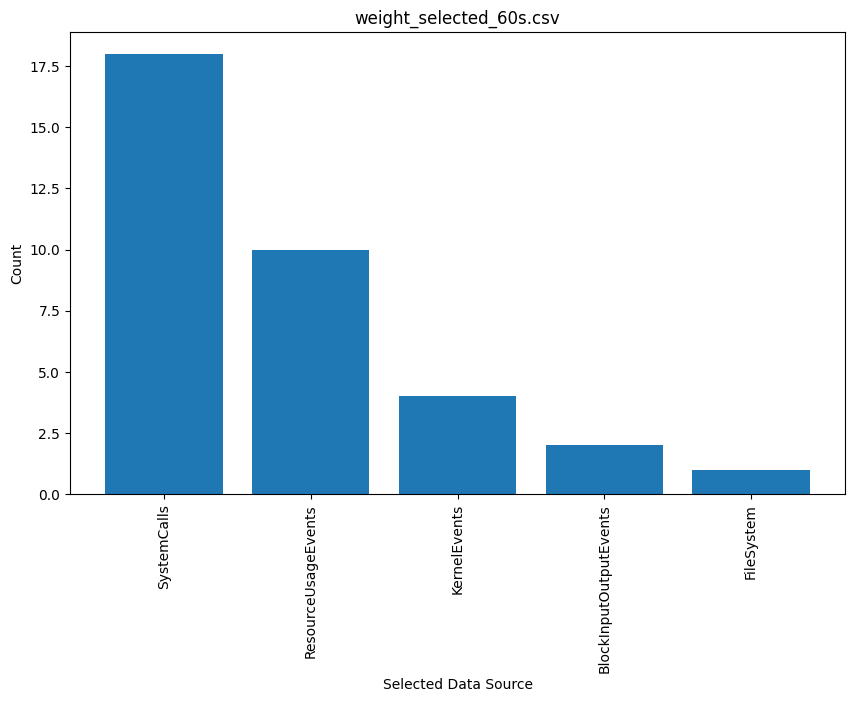

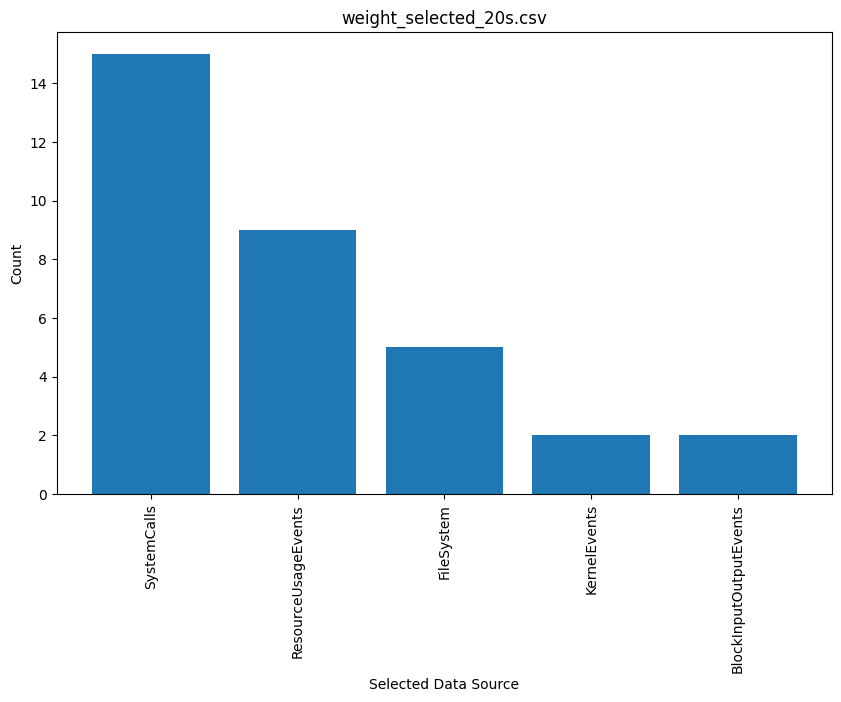

In [8]:
for x, group_df in all_df.groupby("file_path"):
    import matplotlib.pyplot as plt

    dic = group_df["data_source"].value_counts()
    key_strs = [str(f).removeprefix("DataSource.") for f in dic.keys()]

    plt.figure(figsize=(10, 6))
    plt.bar(range(dic.count()), dic.values)
    plt.xlabel('Selected Data Source')
    plt.ylabel('Count')
    plt.title(f'{x.name}')
    plt.xticks(range(dic.count()),key_strs, rotation=90)
    plt.show()

(33, 3)

Plot for:  weight_selected_30s.csv


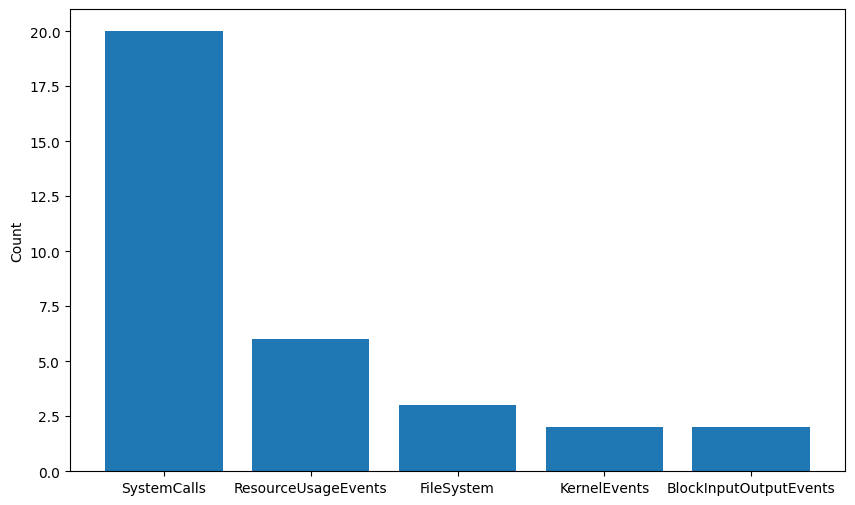

: 

In [22]:
print("Plot for: ", all_df["file_path"].unique()[1].name)
group_df = all_df[all_df["file_path"] == all_df["file_path"].unique()[1]]


import matplotlib.pyplot as plt

dic = group_df["data_source"].value_counts()
key_strs = [str(f).removeprefix("DataSource.") for f in dic.keys()]

plt.figure(figsize=(10, 6))
plt.bar(range(dic.count()), dic.values)
# plt.xlabel('Selected Data Source')
plt.ylabel('Count')
plt.xticks(range(dic.count()),key_strs, rotation=0)
plt.show()